# Sınıflandırma Modelleri

In [1]:
# KÜTÜPHANELER VE FONKSİYONLAR
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Modelin başarısını değerlendirmek için accuracy score kullanacağız. 
# Bu skor ne kadar büyük ise başarımız o kadar yüksektir. 
# hiperparametrelerin optimum değerlerine ulaşmak için ise cross validation yöntemini kullanacağız.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## Veri Seti ve Background

In [3]:
df = pd.read_csv("diabetes.csv") #Şeker hastalığı tahmin modeli kuracağız.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Logistic Regression (Lojistik Regresyon)

In [4]:
# Model&Tahmin
df["Outcome"].value_counts() #bağımlı değişkenimizi gözlemleyelim.

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.describe().T #betimsel istatistiklere bakalım.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)
# Katsayıları bulmak için birden fazla minimizasyon fonk var. 
# Burada da solver ile bunu belirtebiliriz.

In [10]:
loj_model.intercept_

array([-5.89240472])

In [11]:
loj_model.coef_

array([[ 1.17062103e-01,  2.83893657e-02, -1.68885046e-02,
         7.55568280e-04, -6.42890136e-04,  5.97744495e-02,
         6.77484056e-01,  7.24131135e-03]])

In [12]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [13]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [14]:
y_pred = loj_model.predict(X)

In [15]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [16]:
accuracy_score(y, y_pred) #doğruluk oranı. Neydi bu? başarılı yaptıklarımız / toplam

0.7747395833333334

In [18]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
# burada tahmin etmek istediğimiz değişken 0-1Lerden oluşmakta. Eğer bazı durumlarda bunu 1-0 değerlerinden
# değil de direkt olasılık değerlerinin kendisinden almak istersek ki lojistik fonk bize 1.sınıfın yani
# ilgilenmiş olduğumuz 1-0 sınıflarından 1.sınıfın gerçekleşme olasılığını veriyordu. Dolayısıyla
# bu olasılık değerlerine direkt erişmek istersek bu durumda şu fonk kullanabliriz.

loj_model.predict_proba(X)[0:10]

array([[0.35038755, 0.64961245],
       [0.91703284, 0.08296716],
       [0.22474638, 0.77525362],
       [0.92139942, 0.07860058],
       [0.16726124, 0.83273876],
       [0.79899704, 0.20100296],
       [0.88020482, 0.11979518],
       [0.27811878, 0.72188122],
       [0.32058316, 0.67941684],
       [0.92275108, 0.07724892]])

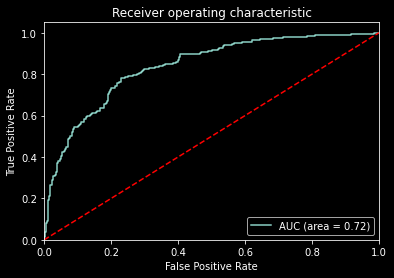

In [20]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model Tuning (Aslında Model Doğrulama)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [11]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [23]:
y_pred = loj_model.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [25]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean() #k katlı çağraz doğrulama ile. 10 adetin ortalaması.

0.7748188405797102

## K-En Yakın Komşu(KNN)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model Tahmin

In [6]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [8]:
? knn_model

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        ~/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'au

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [12]:
knn = KNeighborsClassifier()

In [13]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [14]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [15]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train,y_train)

In [16]:
knn_cv_model.best_score_

0.748637316561845

In [17]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [10]:
# Final Model

knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)

In [19]:
y_pred = knn_tuned.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [21]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

## Support Vector Machines(SVM)

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model Tahmin

In [24]:
#Doğrusal model yapacağız.

svm_model = SVC(kernel='linear').fit(X_train,y_train) #öntanımlı olarak rbf yani doğrusal olmayan demek.

In [25]:
svm_model

SVC(kernel='linear')

In [26]:
y_pred = svm_model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7445887445887446

### Model Tuning

In [29]:
svm_model = SVC()

In [34]:
svm_params = {"C":np.arange(1,5), "kernel":['linear','rbf']}
# c = karmaşıklık, ceza parametresi.
# kernel = doğrusal ve doğrusal olmayan 2 kernel dene dedik. rbf:radial basis func

In [35]:
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [36]:
svm_cv_model.best_score_

0.7839044652128765

In [37]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [12]:
# Final model
# gözlem değişken sayısı az olunca linear yapılar daha iyi gibi. 
# Genelde problemler karmaşıklaşıtıka ve ilişkileri tanımlamak zorlaştıkça doğrusal olmayan yapıların ya da ağaca dayalı yapıların daha başarılı oluyor.

svm_tuned = SVC(C = 2, kernel='linear').fit(X_train,y_train)

In [39]:
y_pred = svm_tuned.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## ANN Yapay Sinir Ağları (Çok katmanlı Algılayıcılar)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [9]:
scaler = StandardScaler() 

# derin öğrenmelerde homojen verisetlerinde iyi çalışmakta.
# mesela karar ağaçları heterojen yapılarda iyidir.
# derin öğrenmelerde değişkenler standartlaştırılırsa daha iyi çalışmakta.

In [10]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [11]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Model & Tahmin

In [12]:
mlpc_model = MLPClassifier().fit(X_train, y_train) #multi layer perceptron classification

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [13]:
mlpc_model.coefs_ # bunlar bu sinir ağının farklı katmanlardaki farklı hücrelerin birbirleri ile ilişkilerini ifade eden katsayılar

[array([[ 1.86987302e-03,  1.61041510e-02, -1.38551345e-01,
         -1.41560193e-01,  1.51163723e-01, -1.01618310e-01,
         -1.56041328e-01, -9.02386108e-03,  9.92001184e-02,
          4.20108120e-02, -2.49753458e-02,  1.52258044e-01,
         -2.99240755e-01, -3.23491100e-02,  1.43721957e-02,
          2.13606034e-02, -4.24982360e-01, -4.11527147e-02,
          8.37323708e-02,  3.02839713e-01, -1.63259771e-01,
          8.74473455e-02,  1.72163601e-01,  3.67754886e-01,
         -3.08794249e-01,  4.78551759e-02,  7.73248116e-02,
         -4.05136190e-02,  7.67592597e-02, -3.73870141e-01,
          7.98467054e-02,  8.85085818e-02,  1.94584729e-01,
         -1.74056779e-02,  5.16837783e-04,  1.86084275e-02,
         -3.22831480e-01,  1.42901070e-01,  4.64794083e-02,
          1.26115068e-01,  2.15691453e-01,  2.57795144e-02,
          5.26098256e-02,  1.29417255e-01, -2.77528968e-01,
         -2.52162490e-01,  2.71443174e-01,  2.50665954e-02,
         -7.85014173e-02, -2.99707757e-0

In [14]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='

In [15]:
y_pred = mlpc_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

In [16]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

# alpha = ceza terimi yani düzenlileştirme terimi lassodan bildiğimiz.
# hidden layer = kaç katma olmalı, her katmanda kaçar tane olmalı mesela (10,10) iki ktmandan oluşsun 1.katmanda 10 ikinci katmanda 10 nöron demek.
# solver yani ağırlık optimizasyonu için küçük veri seti olduğu için lbfgs kullanıcaz. Büyük olsaydı adam kullanırdık.
# activasyon olarak logistic func kullanacağız.

In [17]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [18]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [19]:
mlpc_cv_model

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (100, 100), (3, 5)]},
             verbose=2)

In [20]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [13]:
# Final model

mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 1, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
y_pred = mlpc_tuned.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.7575757575757576

## CART(Classification and Regression)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [6]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [7]:
y_pred = cart_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7012987012987013

#### Model Tuning

In [9]:
cart = DecisionTreeClassifier()

In [10]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [11]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [12]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [14]:
#Final Model

cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(X_train, y_train)


In [14]:
y_pred = cart_tuned.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forest

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Model & Tahmin

In [17]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [18]:
rf_model

RandomForestClassifier()

In [19]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

### Model Tuning

In [20]:
rf = RandomForestClassifier()

In [21]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

# n estimators: kullanılacak ağaç sayısı
# max features: max değişken sayısı
# min_samples_split: min ayırma sayısı

In [22]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [23]:
rf_cv_model.best_params_

{'max_features': 7, 'min_samples_split': 5, 'n_estimators': 200}

In [15]:
# Final model

rf_tuned = RandomForestClassifier(max_features = 3, 
                                  min_samples_split = 5, 
                                  n_estimators = 200).fit(X_train, y_train)

In [32]:
y_pred = rf_tuned.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.7532467532467533

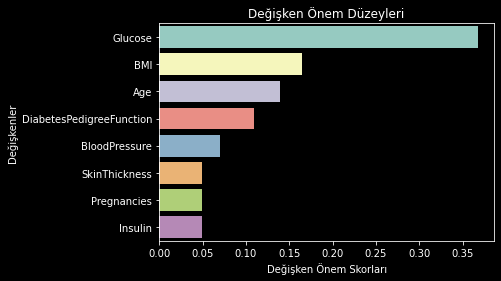

In [27]:
# Değisken Önem Düzeyleri

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## Gradient Boosting Machines

In [7]:
# Model Tahmin

gbm_model = GradientBoostingClassifier().fit(X_train, y_train) #parametreleri henüz değiştirmedik.


In [9]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        ~/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning 

In [10]:
y_pred = gbm_model.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [12]:
# Model Tuning: parametreleri ayarlayalım

gbm = GradientBoostingClassifier()

In [14]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}

# veri seti büyük olunca, n estimators un büyük olması iyi oluyor. Ağaç sayısının fazla olması, detaya girme anlamına geliyor.

In [15]:
gbm_cv_model= GridSearchCV(gbm, gbm_params, 
                           cv = 5, 
                           n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [16]:
gbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [16]:
# Final Model
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.05,
                                       max_depth = 3, 
                                       n_estimators = 100).fit(X_train, y_train)

In [18]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

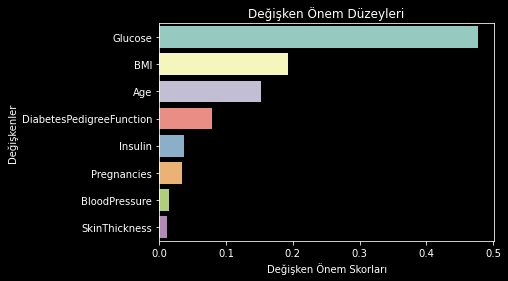

In [19]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## XGBoost

In [20]:
# Model Tahmin
!pip install xgboost

In [6]:
from xgboost import XGBClassifier

In [22]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [23]:
?xgb_model

Type:        XGBClassifier
String form: XGBClassifier()
File:        ~/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the learning task and the corresponding learning objective or
    a custom objective function to be used (see note below).
booster: string
    Specify which booster to use: gbtree, gblinear or dart.
nthread : int
    Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
n_jobs : int
    Number of parallel threads used to run xgbo

In [24]:
y_pred = xgb_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [26]:
# Model Tuning

xgb = XGBClassifier()

In [27]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [28]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [29]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}

In [17]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 500, 
                                subsample= 1).fit(X_train, y_train)

In [31]:
y_pred = xgb_tuned.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7532467532467533

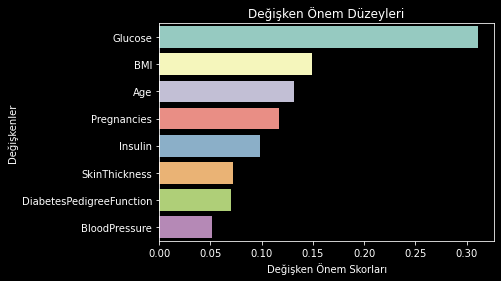

In [33]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## Light GBM

In [34]:
# Model Tahmin
!pip install lightgbm

In [7]:
from lightgbm import LGBMClassifier

In [36]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [37]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           ~/opt/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional 

In [38]:
y_pred = lgbm_model.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.7229437229437229

In [40]:
# Model Tuning

lgbm = LGBMClassifier()

In [41]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}

In [42]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [43]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}

In [18]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01, 
                            max_depth= 8, 
                            n_estimators= 100).fit(X_train, y_train)

In [45]:
y_pred = lgbm_tuned.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7662337662337663

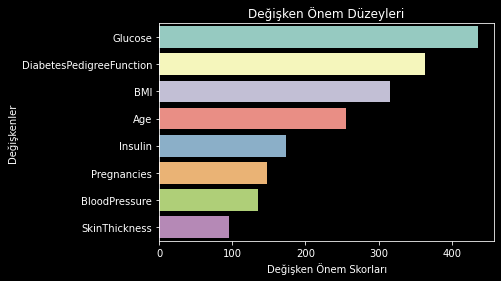

In [47]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## CatBoost

In [48]:
# Model & Tahmin

!pip install catboost

In [8]:
from catboost import CatBoostClassifier

In [50]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [51]:
?catb_model

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x7f8250092c50>
File:           ~/opt/anaconda3/lib/python3.7/site-packages/catboost/core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf]
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,+inf]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf]
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf]
rsm : float, [default=None]
    Subsample ratio of columns when

In [52]:
y_pred = catb_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [54]:
# Model Tuning

catb = CatBoostClassifier()

In [55]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}
# iterations = n_estimators

In [56]:
catb_cv_model = GridSearchCV(catb, catb_params, 
                             cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6863312	total: 8.32ms	remaining: 1.66s
1:	learn: 0.6811157	total: 14.8ms	remaining: 1.47s
2:	learn: 0.6752970	total: 25.4ms	remaining: 1.67s
3:	learn: 0.6697432	total: 28.4ms	remaining: 1.39s
4:	learn: 0.6641758	total: 35.3ms	remaining: 1.38s
5:	learn: 0.6576656	total: 39.1ms	remaining: 1.26s
6:	learn: 0.6521870	total: 42.1ms	remaining: 1.16s
7:	learn: 0.6465564	total: 45.3ms	remaining: 1.09s
8:	learn: 0.6407595	total: 51ms	remaining: 1.08s
9:	learn: 0.6357725	total: 54ms	remaining: 1.02s
10:	learn: 0.6299942	total: 57ms	remaining: 980ms
11:	learn: 0.6240480	total: 60.9ms	remaining: 954ms
12:	learn: 0.6196095	total: 65.1ms	remaining: 936ms
13:	learn: 0.6148715	total: 67.8ms	remaining: 900ms
14:	learn: 0.6092626	total: 70.9ms	remaining: 874ms
15:	learn: 0.6046764	total: 74ms	remaining: 850ms
16:	learn: 0.6012725	total: 79.8ms	remaining: 859ms
17:	learn: 0.5958121	total: 83.5ms	remaining: 845ms
18:	learn: 0.5903243

In [57]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [19]:
catb_tuned = CatBoostClassifier(depth= 8, 
                                iterations= 200, 
                                learning_rate= 0.01).fit(X_train, y_train)

0:	learn: 0.6863312	total: 59.4ms	remaining: 11.8s
1:	learn: 0.6811157	total: 86.3ms	remaining: 8.54s
2:	learn: 0.6752970	total: 92.1ms	remaining: 6.04s
3:	learn: 0.6697432	total: 104ms	remaining: 5.11s
4:	learn: 0.6641758	total: 109ms	remaining: 4.27s
5:	learn: 0.6576656	total: 116ms	remaining: 3.76s
6:	learn: 0.6521870	total: 121ms	remaining: 3.34s
7:	learn: 0.6465564	total: 126ms	remaining: 3.03s
8:	learn: 0.6407595	total: 133ms	remaining: 2.83s
9:	learn: 0.6357725	total: 139ms	remaining: 2.64s
10:	learn: 0.6299942	total: 146ms	remaining: 2.5s
11:	learn: 0.6240480	total: 152ms	remaining: 2.38s
12:	learn: 0.6196095	total: 159ms	remaining: 2.29s
13:	learn: 0.6148715	total: 165ms	remaining: 2.19s
14:	learn: 0.6092626	total: 171ms	remaining: 2.11s
15:	learn: 0.6046764	total: 177ms	remaining: 2.03s
16:	learn: 0.6012725	total: 181ms	remaining: 1.95s
17:	learn: 0.5958121	total: 289ms	remaining: 2.92s
18:	learn: 0.5903243	total: 296ms	remaining: 2.82s
19:	learn: 0.5866024	total: 312ms	remai

In [59]:
y_pred = catb_tuned.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7532467532467533

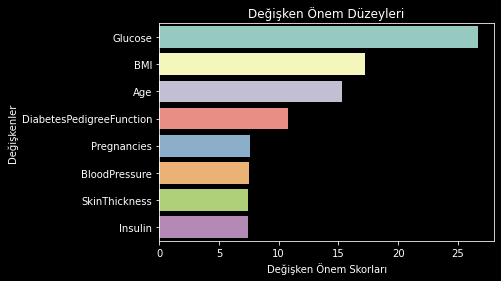

In [61]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## Tüm Modellerin Karşılaştırılması

In [20]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

# Yukarıdakiler string değil, bunlar model nesnesi. Tırnak yok.

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

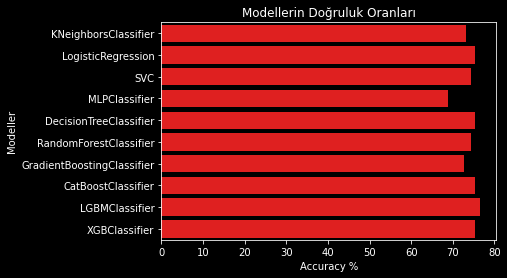

In [21]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [22]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,68.831169
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,72.727273
0,CatBoostClassifier,75.324675
0,LGBMClassifier,76.623377
0,XGBClassifier,75.324675
